### Sequence models with Poem

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import csv
import json

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
data = '''In the town of Athy one Jeremy Lanigan\n
Battered away til he hadnt a pound.\n
His father died and made him a man again\n
Left him a farm and ten acres of ground.\n
He gave a grand party for friends and relations\n
Who didnt forget him when come to the wall,\n
And if youll but listen Ill make your eyes glisten\n
Of the rows and the ructions of Lanigans Ball.\n
Myself to be sure got free invitation,\n
For all the nice girls and boys I might ask,\n
And just in a minute both friends and relations\n
Were dancing round merry as bees round a cask.\n
Judy ODaly, that nice little milliner,\n
She tipped me a wink for to give her a call,\n
And I soon arrived with Peggy McGilligan\n
Just in time for Lanigans Ball.\n
There were lashings of punch and wine for the ladies,\n
Potatoes and cakes; there was bacon and tea,\n
There were the Nolans, Dolans, OGradys\n
Courting the girls and dancing away.\n
Songs they went round as plenty as water,\n
The harp that once sounded in Taras old hall,\n
Sweet Nelly Gray and The Rat Catchers Daughter,\n
All singing together at Lanigans Ball.\n
They were doing all kinds of nonsensical polkas\n
All round the room in a whirligig.\n
Julia and I, we banished their nonsense\n
And tipped them the twist of a reel and a jig.\n
Ach mavrone, how the girls got all mad at me\n
Danced til youd think the ceiling would fall.\n
For I spent three weeks at Brooks Academy\n
Learning new steps for Lanigans Ball.\n
Three long weeks I spent up in Dublin,\n
Three long weeks to learn nothing at all,\n
Three long weeks I spent up in Dublin,\n
Learning new steps for Lanigans Ball.\n
She stepped out and I stepped in again,\n
I stepped out and she stepped in again,\n
She stepped out and I stepped in again,\n
Learning new steps for Lanigans Ball.\n
Boys were all merry and the girls they were hearty\n
And danced all around in couples and groups,\n
Til an accident happened, young Terrance McCarthy\n
Put his right leg through miss Finnertys hoops.\n
Poor creature fainted and cried Meelia murther,\n
Called for her brothers and gathered them all.\n
Carmody swore that hed go no further\n
Til he had satisfaction at Lanigans Ball.\n
In the midst of the row miss Kerrigan fainted,\n
Her cheeks at the same time as red as a rose.\n
Some of the lads declared she was painted,\n
She took a small drop too much, I suppose.\n
Her sweetheart, Ned Morgan, so powerful and able,\n
When he saw his fair colleen stretched out by the wall,\n
Tore the left leg from under the table\n
And smashed all the Chaneys at Lanigans Ball.\n
Boys, oh boys, twas then there were runctions.\n
Myself got a lick from big Phelim McHugh.\n
I soon replied to his introduction\n
And kicked up a terrible hullabaloo.\n
Old Casey, the piper, was near being strangled.\n
They squeezed up his pipes, bellows, chanters and all.\n
The girls, in their ribbons, they got all entangled\n
And that put an end to Lanigans Ball.'''

In [ ]:
corpus = data.lower().split("\n")                   # making lower and sentences

In [ ]:
corpus[:5]

['in the town of athy one jeremy lanigan',
 '',
 'battered away til he hadnt a pound.',
 '',
 'his father died and made him a man again']

In [ ]:
corpus = [line for line in corpus if len(line)>0]

In [ ]:
corpus[:5]

['in the town of athy one jeremy lanigan',
 'battered away til he hadnt a pound.',
 'his father died and made him a man again',
 'left him a farm and ten acres of ground.',
 'he gave a grand party for friends and relations']

In [ ]:
len(corpus)                                         # 64 lines

64

In [ ]:
PADDING_TYPE = 'pre'
OOV_TOKEN = '<OOV>'

In [ ]:
tokenizer = Tokenizer(oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index

In [ ]:
# just checking out word_index

d = tokenizer.word_index                            # tokenizer.word_index is a dictionary of all words with indices
l = {'daughter', 'listen'}

{key:d[key] for key in l if key in d}               # just viewing some of the keys

{'daughter': 148, 'listen': 93}

In [ ]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [ ]:
input_sequences[:13]

[[5, 3],
 [5, 3, 67],
 [5, 3, 67, 9],
 [5, 3, 67, 9, 68],
 [5, 3, 67, 9, 68, 69],
 [5, 3, 67, 9, 68, 69, 70],
 [5, 3, 67, 9, 68, 69, 70, 71],
 [72, 41],
 [72, 41, 21],
 [72, 41, 21, 22],
 [72, 41, 21, 22, 73],
 [72, 41, 21, 22, 73, 4],
 [72, 41, 21, 22, 73, 4, 74]]

In [ ]:
VOCAB_SIZE = len(word_index) + 1                        # total words or vocab size = total tokens + 1 for OOV
EMBED_DIM = 64                                          # randomly embedding to 64 dimensions
MAX_LEN = max([len(x) for x in input_sequences])        # finding longest sentence, let if highest length is 4 and then pre pad all sequences

In [ ]:
print(VOCAB_SIZE)
print(EMBED_DIM)
print(MAX_LEN)

264
64
11


In [ ]:
# pad sequences 

input_sequences = pad_sequences(input_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE)                  # (0,0,3,10),(0,3,10,23),(3,10,23,5)
input_sequences = np.array(input_sequences)

In [ ]:
input_sequences[:13]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  3, 67],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  3, 67,  9],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 67,  9, 68],
       [ 0,  0,  0,  0,  0,  5,  3, 67,  9, 68, 69],
       [ 0,  0,  0,  0,  5,  3, 67,  9, 68, 69, 70],
       [ 0,  0,  0,  5,  3, 67,  9, 68, 69, 70, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 72, 41, 21],
       [ 0,  0,  0,  0,  0,  0,  0, 72, 41, 21, 22],
       [ 0,  0,  0,  0,  0,  0, 72, 41, 21, 22, 73],
       [ 0,  0,  0,  0,  0, 72, 41, 21, 22, 73,  4],
       [ 0,  0,  0,  0, 72, 41, 21, 22, 73,  4, 74]], dtype=int32)

In [ ]:
len(input_sequences[0])

11

In [ ]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=VOCAB_SIZE)     # one hot encoding of labels

In [ ]:
xs[:13]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  3, 67],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 67,  9],
       [ 0,  0,  0,  0,  0,  5,  3, 67,  9, 68],
       [ 0,  0,  0,  0,  5,  3, 67,  9, 68, 69],
       [ 0,  0,  0,  5,  3, 67,  9, 68, 69, 70],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 72, 41],
       [ 0,  0,  0,  0,  0,  0,  0, 72, 41, 21],
       [ 0,  0,  0,  0,  0,  0, 72, 41, 21, 22],
       [ 0,  0,  0,  0,  0, 72, 41, 21, 22, 73],
       [ 0,  0,  0,  0, 72, 41, 21, 22, 73,  4]], dtype=int32)

In [ ]:
len(xs[0])

10

In [ ]:
len(labels)

453

In [ ]:
len(ys[0])

264

In [ ]:
labels[:13]

array([ 3, 67,  9, 68, 69, 70, 71, 41, 21, 22, 73,  4, 74], dtype=int32)

In [ ]:
ys[:13]           # encoded labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
corpus[0]

'in the town of athy one jeremy lanigan'

In [ ]:
# checking indexes of 1st sentence

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

5
3
67
9
68
69
70
71


In [ ]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[ 0  0  0  0  5  3 67  9 68 69 70]
70

[ 0  0  0  0  5  3 67  9 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
NUM_CLASSES = VOCAB_SIZE

In [ ]:
model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN-1),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16896     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 264)               17160     
                                                                 
Total params: 58,888
Trainable params: 58,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='loss', patience=20)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=15, min_lr=0.0001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
EPOCHS = 100
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [ ]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/100
15/15 [==============================] - 9s 13ms/step - loss: 5.5326 - accuracy: 0.0353 - lr: 0.0100
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 5.1332 - accuracy: 0.0486 - lr: 0.0100
Epoch 3/100
15/15 [==============================] - 0s 12ms/step - loss: 4.8505 - accuracy: 0.0552 - lr: 0.0100
Epoch 4/100
15/15 [==============================] - 0s 13ms/step - loss: 4.5267 - accuracy: 0.0993 - lr: 0.0100
Epoch 5/100
15/15 [==============================] - 0s 13ms/step - loss: 4.0966 - accuracy: 0.1258 - lr: 0.0100
Epoch 6/100
15/15 [==============================] - 0s 13ms/step - loss: 3.5363 - accuracy: 0.2340 - lr: 0.0100
Epoch 7/100
15/15 [==============================] - 0s 13ms/step - loss: 2.9185 - accuracy: 0.3223 - lr: 0.0100
Epoch 8/100
15/15 [==============================] - 0s 12ms/step - loss: 2.3857 - accuracy: 0.4437 - lr: 0.0100
Epoch 9/100
15/15 [==============================] - 0s 13ms/step - loss: 1.9025 - accuracy: 0.5

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

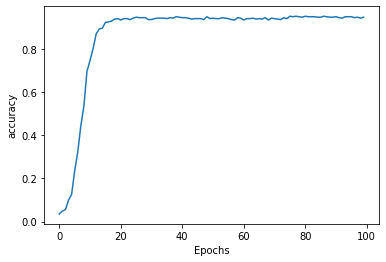

In [ ]:
plot_graphs(history, 'accuracy')

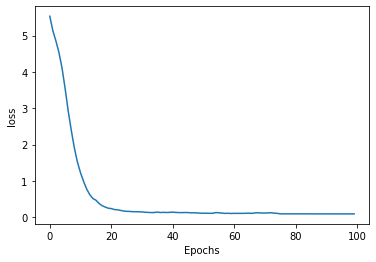

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
seed_text = "Laurence went to dublin"
next_words = 50                        # predicting next 50 words

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=MAX_LEN-1, padding=PADDING_TYPE)
    predicted = np.argmax(model.predict(token_list), axis=-1)          # will give the index of the word most likely to be the next word in sequence
    output_word = ""
    for word, index in tokenizer.word_index.items():                  # checking the actual words mapped against the word index
        if index == predicted:
          output_word = word
          break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin sure got colleen invitation invitation wall wall invitation his phelim mchugh your stretched ball entangled wall wall wall got lanigan old fainted lanigan tea ground entangled a jig jig jig to ground ground entangled wall wall the jig rose hearty wall was near being strangled your glisten your glisten glisten


## Bigger corpus

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /content/irish-lyrics-eof.txt

--2021-11-16 06:29:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/content/irish-lyrics-eof.txt’

/content/irish-lyri 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-11-16 06:29:26 (54.8 MB/s) - ‘/content/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
data = open('/content/irish-lyrics-eof.txt').read()

In [5]:
data[:50]

'Come all ye maidens young and fair\nAnd you that ar'

In [6]:
len(data)

68953

In [7]:
corpus = data.lower().split("\n")

In [8]:
corpus[:5]

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing']

In [9]:
len(corpus)

1693

In [10]:
PADDING_TYPE = 'pre'
OOV_TOKEN = '<OOV>'

In [11]:
tokenizer = Tokenizer(oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(corpus)

In [12]:
# just checking out word_index

d = tokenizer.word_index                            # tokenizer.word_index is a dictionary of all words with indices
l = {'awake', 'playing'}

{key:d[key] for key in l if key in d}               # just viewing some of the keys

{'awake': 944, 'playing': 971}

In [13]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [14]:
input_sequences[:13]

[[52, 13],
 [52, 13, 97],
 [52, 13, 97, 1218],
 [52, 13, 97, 1218, 49],
 [52, 13, 97, 1218, 49, 3],
 [52, 13, 97, 1218, 49, 3, 70],
 [3, 12],
 [3, 12, 16],
 [3, 12, 16, 32],
 [3, 12, 16, 32, 362],
 [3, 12, 16, 32, 362, 9],
 [3, 12, 16, 32, 362, 9, 25],
 [3, 12, 16, 32, 362, 9, 25, 1219]]

In [16]:
VOCAB_SIZE = len(tokenizer.word_index) + 1                # total words or vocab size = total tokens + 1 for OOV
EMBED_DIM = 100                                           # randomly embedding to 100 dimensions
MAX_LEN = max([len(x) for x in input_sequences])          # finding longest sentence, let if highest length is 4 and then pre pad all sequences

In [17]:
print(VOCAB_SIZE)
print(EMBED_DIM)
print(MAX_LEN)

2691
100
16


In [18]:
# pad sequences 

input_sequences = pad_sequences(input_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE)                  # (0,0,3,10),(0,3,10,23),(3,10,23,5)
input_sequences = np.array(input_sequences)

In [19]:
input_sequences[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   52,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   52,   13,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   52,   13,   97, 1218],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          52,   13,   97, 1218,   49],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   52,
          13,   97, 1218,   49,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   52,   13,
          97, 1218,   49,    3,   70],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    3,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3,   12,   16],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,   

In [20]:
len(input_sequences[0])

16

In [21]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=VOCAB_SIZE)     # one hot encoding of labels

In [22]:
len(xs[0])

15

In [23]:
len(labels)

12038

In [24]:
len(ys[0])

2691

In [25]:
labels[:13]

array([  13,   97, 1218,   49,    3,   70,   12,   16,   32,  362,    9,
         25, 1219], dtype=int32)

In [26]:
ys[:13]           # encoded labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
corpus[0]

'come all ye maidens young and fair'

In [28]:
# checking indexes of 1st sentence

print(tokenizer.word_index['come'])
print(tokenizer.word_index['all'])
print(tokenizer.word_index['ye'])
print(tokenizer.word_index['maidens'])
print(tokenizer.word_index['young'])
print(tokenizer.word_index['and'])
print(tokenizer.word_index['fair'])

52
13
97
1218
49
3
70


In [29]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   52   13   97 1218   49
    3   70]
70

[   0    0    0    0    0    0    0    0    0   52   13   97 1218   49
    3]
[0. 0. 0. ... 0. 0. 0.]


In [30]:
NUM_CLASSES = VOCAB_SIZE

In [32]:
model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN-1),
    layers.Bidirectional(layers.LSTM(150)),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2691)              809991    
                                                                 
Total params: 1,380,291
Trainable params: 1,380,291
Non-trainable params: 0
_________________________________________________________________


In [34]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [35]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [36]:
early_stopping    = EarlyStopping(monitor='loss', patience=20)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=15, min_lr=0.0001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [38]:
EPOCHS = 100
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [39]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/100
377/377 [==============================] - 15s 19ms/step - loss: 6.6282 - accuracy: 0.0773 - lr: 0.0100
Epoch 2/100
377/377 [==============================] - 7s 18ms/step - loss: 5.7433 - accuracy: 0.1132 - lr: 0.0100
Epoch 3/100
377/377 [==============================] - 7s 18ms/step - loss: 5.1666 - accuracy: 0.1488 - lr: 0.0100
Epoch 4/100
377/377 [==============================] - 7s 18ms/step - loss: 4.0551 - accuracy: 0.2270 - lr: 0.0100
Epoch 5/100
377/377 [==============================] - 7s 18ms/step - loss: 3.1537 - accuracy: 0.3280 - lr: 0.0100
Epoch 6/100
377/377 [==============================] - 7s 18ms/step - loss: 2.5059 - accuracy: 0.4388 - lr: 0.0100
Epoch 7/100
377/377 [==============================] - 7s 19ms/step - loss: 2.0360 - accuracy: 0.5279 - lr: 0.0100
Epoch 8/100
377/377 [==============================] - 7s 18ms/step - loss: 1.6753 - accuracy: 0.6005 - lr: 0.0100
Epoch 9/100
377/377 [==============================] - 7s 18ms/step - loss: 1.4

In [40]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

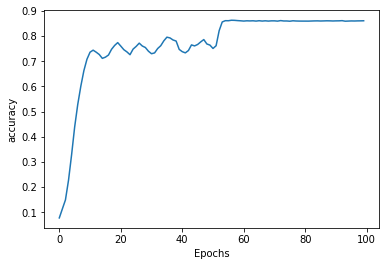

In [41]:
plot_graphs(history, 'accuracy')

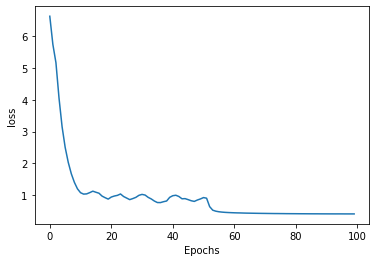

In [42]:
plot_graphs(history, 'loss')

In [44]:
seed_text = "I've got a bad feeling about this"
next_words = 50
  
for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=MAX_LEN-1, padding=PADDING_TYPE)
		predicted = np.argmax(model.predict(token_list), axis=-1)
		output_word = ""
		for word, index in tokenizer.word_index.items():
				if index == predicted:
						output_word = word
						break
		seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this foemans sun will see me contented ill be born with an hours of diamond unprofaned for a neat rust looked fields young fellows gone and end to ireland i did meet me my dead had makes only love gone by mother the good down yonder lane it whiskey are roving


## Exercise 12 - BiLSTM

In [45]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /content/sonnets.txt

--2021-11-16 06:56:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/content/sonnets.txt’

/content/sonnets.tx 100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-11-16 06:56:48 (85.6 MB/s) - ‘/content/sonnets.txt’ saved [93578/93578]



In [46]:
data = open('/content/sonnets.txt').read()

In [47]:
data[:50]

'FROM fairest creatures we desire increase,\nThat th'

In [48]:
len(data)

93578

In [49]:
corpus = data.lower().split("\n")

In [50]:
corpus[:5]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,']

In [51]:
len(corpus)

2159

In [52]:
PADDING_TYPE = 'pre'
OOV_TOKEN = '<OOV>'

In [53]:
tokenizer = Tokenizer(oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(corpus)

In [56]:
# just checking out word_index

d = tokenizer.word_index                            # tokenizer.word_index is a dictionary of all words with indices
l = {'memory', 'fairest'}

{key:d[key] for key in l if key in d}               # just viewing some of the keys

{'fairest': 418, 'memory': 279}

In [57]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [58]:
input_sequences[:13]

[[35, 418],
 [35, 418, 878],
 [35, 418, 878, 167],
 [35, 418, 878, 167, 214],
 [35, 418, 878, 167, 214, 518],
 [9, 879],
 [9, 879, 135],
 [9, 879, 135, 352],
 [9, 879, 135, 352, 103],
 [9, 879, 135, 352, 103, 157],
 [9, 879, 135, 352, 103, 157, 200],
 [17, 23],
 [17, 23, 3]]

In [59]:
VOCAB_SIZE = len(tokenizer.word_index) + 1                # total words or vocab size = total tokens + 1 for OOV
EMBED_DIM = 150                                           # randomly embedding to 150 dimensions
MAX_LEN = max([len(x) for x in input_sequences])          # finding longest sentence, let if highest length is 4 and then pre pad all sequences

In [60]:
print(VOCAB_SIZE)
print(EMBED_DIM)
print(MAX_LEN)

3212
150
11


In [61]:
# pad sequences 

input_sequences = pad_sequences(input_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE)                  # (0,0,3,10),(0,3,10,23),(3,10,23,5)
input_sequences = np.array(input_sequences)

In [62]:
input_sequences[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 418],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 418, 878],
       [  0,   0,   0,   0,   0,   0,   0,  35, 418, 878, 167],
       [  0,   0,   0,   0,   0,   0,  35, 418, 878, 167, 214],
       [  0,   0,   0,   0,   0,  35, 418, 878, 167, 214, 518],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 879],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9, 879, 135],
       [  0,   0,   0,   0,   0,   0,   0,   9, 879, 135, 352],
       [  0,   0,   0,   0,   0,   0,   9, 879, 135, 352, 103],
       [  0,   0,   0,   0,   0,   9, 879, 135, 352, 103, 157]],
      dtype=int32)

In [63]:
len(input_sequences[0])

11

In [64]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=VOCAB_SIZE)     # one hot encoding of labels

In [65]:
len(xs[0])

10

In [66]:
len(labels)

15462

In [67]:
len(ys[0])

3212

In [68]:
labels[:13]

array([418, 878, 167, 214, 518, 879, 135, 352, 103, 157, 200,  23,   3],
      dtype=int32)

In [69]:
ys[:13]           # encoded labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
corpus[0]

'from fairest creatures we desire increase,'

In [71]:
# checking indexes of 1st sentence

print(tokenizer.word_index['from'])
print(tokenizer.word_index['fairest'])
print(tokenizer.word_index['creatures'])
print(tokenizer.word_index['we'])
print(tokenizer.word_index['desire'])
print(tokenizer.word_index['increase'])

35
418
878
167
214
518


In [72]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   9 879]
879

[0 0 0 0 0 0 0 0 0 9]
[0. 0. 0. ... 0. 0. 0.]


In [73]:
NUM_CLASSES = VOCAB_SIZE

In [74]:
model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN-1),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(VOCAB_SIZE/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 150)           481800    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              110080    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1606)              207174    
                                                                 
 dense_3 (Dense)             (None, 3212)              5161684   
                                                                 
Total params: 5,960,738
Trainable params: 5,960,738
Non-trainable params: 0
____________________________________________

In [76]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [77]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [80]:
early_stopping    = EarlyStopping(monitor='loss', patience=15)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=20, min_lr=0.0001, mode='min', factor=0.1, verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [81]:
EPOCHS = 150
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [82]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/150
484/484 [==============================] - 12s 18ms/step - loss: 6.9411 - accuracy: 0.0210 - lr: 0.0010
Epoch 2/150
484/484 [==============================] - 9s 18ms/step - loss: 6.5089 - accuracy: 0.0235 - lr: 0.0010
Epoch 3/150
484/484 [==============================] - 9s 18ms/step - loss: 6.3962 - accuracy: 0.0274 - lr: 0.0010
Epoch 4/150
484/484 [==============================] - 9s 18ms/step - loss: 6.2719 - accuracy: 0.0340 - lr: 0.0010
Epoch 5/150
484/484 [==============================] - 9s 18ms/step - loss: 6.1509 - accuracy: 0.0382 - lr: 0.0010
Epoch 6/150
484/484 [==============================] - 9s 18ms/step - loss: 6.0331 - accuracy: 0.0423 - lr: 0.0010
Epoch 7/150
484/484 [==============================] - 9s 18ms/step - loss: 5.9143 - accuracy: 0.0459 - lr: 0.0010
Epoch 8/150
484/484 [==============================] - 9s 18ms/step - loss: 5.7972 - accuracy: 0.0545 - lr: 0.0010
Epoch 9/150
484/484 [==============================] - 8s 17ms/step - loss: 5.6

In [83]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

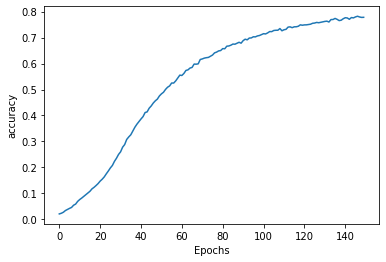

In [84]:
plot_graphs(history, 'accuracy')

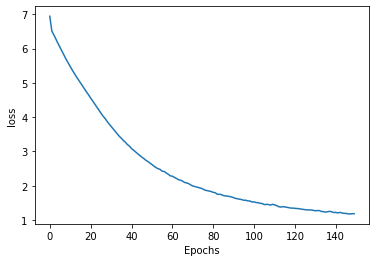

In [85]:
plot_graphs(history, 'loss')

In [86]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 50
  
for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=MAX_LEN-1, padding=PADDING_TYPE)
		predicted = np.argmax(model.predict(token_list), axis=-1)
		output_word = ""
		for word, index in tokenizer.word_index.items():
				if index == predicted:
						output_word = word
						break
		seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope out of thy mind in brain ' lends heart eyes another night name no self wrong bower commits white canst hold yet now be yourself's staineth decease near betray abuse me well doth mend the style all all the deep to me men doth invited green all created is shape


## Exercise 12 - Stacked LSTM

In [87]:
model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN-1),
    layers.Bidirectional(layers.LSTM(64, return_sequences = True)),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dense(VOCAB_SIZE/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 150)           481800    
                                                                 
 bidirectional_3 (Bidirectio  (None, 10, 128)          110080    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                20608     
                                                                 
 dense_4 (Dense)             (None, 1606)              52998     
                                                                 
 dense_5 (Dense)             (None, 3212)              5161684   
                                                      

In [89]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [90]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [91]:
early_stopping    = EarlyStopping(monitor='loss', patience=15)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=20, min_lr=0.0001, mode='min', factor=0.1, verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [92]:
EPOCHS = 150
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [93]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/150
484/484 [==============================] - 17s 23ms/step - loss: 6.8533 - accuracy: 0.0208 - lr: 0.0010
Epoch 2/150
484/484 [==============================] - 11s 23ms/step - loss: 6.4979 - accuracy: 0.0217 - lr: 0.0010
Epoch 3/150
484/484 [==============================] - 11s 23ms/step - loss: 6.3997 - accuracy: 0.0242 - lr: 0.0010
Epoch 4/150
484/484 [==============================] - 11s 23ms/step - loss: 6.2838 - accuracy: 0.0268 - lr: 0.0010
Epoch 5/150
484/484 [==============================] - 11s 23ms/step - loss: 6.1892 - accuracy: 0.0328 - lr: 0.0010
Epoch 6/150
484/484 [==============================] - 11s 23ms/step - loss: 6.1166 - accuracy: 0.0367 - lr: 0.0010
Epoch 7/150
484/484 [==============================] - 11s 23ms/step - loss: 6.0495 - accuracy: 0.0404 - lr: 0.0010
Epoch 8/150
484/484 [==============================] - 11s 23ms/step - loss: 5.9861 - accuracy: 0.0410 - lr: 0.0010
Epoch 9/150
484/484 [==============================] - 11s 23ms/step - l

In [94]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

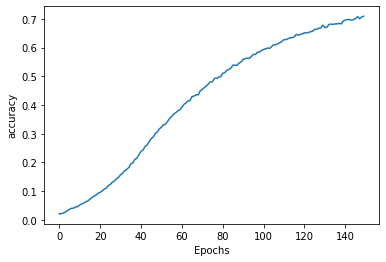

In [95]:
plot_graphs(history, 'accuracy')

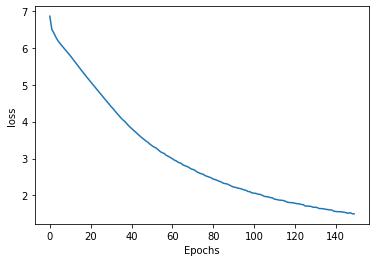

In [96]:
plot_graphs(history, 'loss')